<a href="https://www.kaggle.com/code/vtrackstar/ibm-employee-attrition-data-analysis-project?scriptVersionId=212927902" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## Ask
* What factors lead to employee retention or attrition?

## Prepare

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ibm-hr-analytics-attrition-dataset/WA_Fn-UseC_-HR-Employee-Attrition.csv


In [2]:
employee = pd.read_csv('/kaggle/input/ibm-hr-analytics-attrition-dataset/WA_Fn-UseC_-HR-Employee-Attrition.csv')
employee

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [3]:
employee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [4]:
employee.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [5]:
employee.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [6]:
employee.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

## Process
### Exploratory Data Analysis

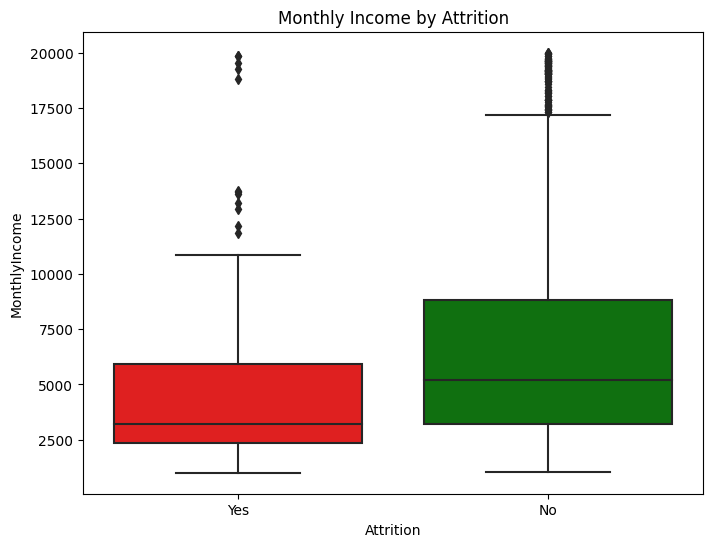

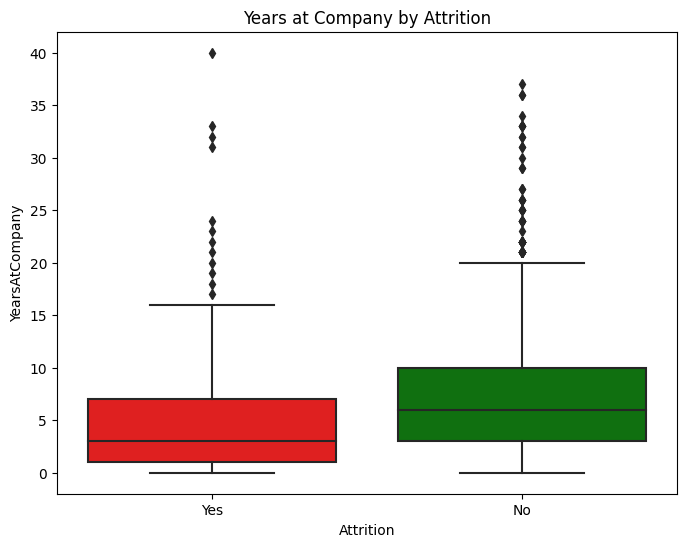

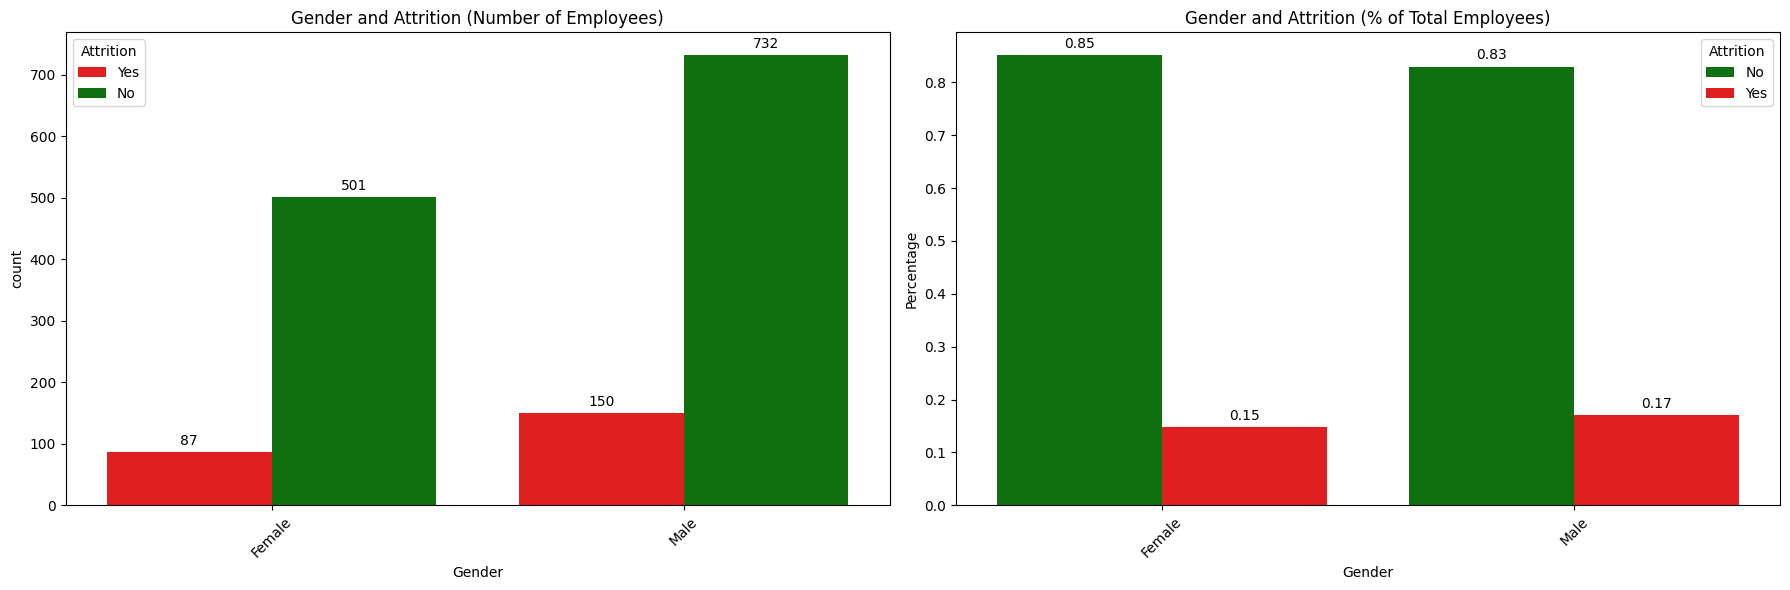

In [7]:
# Distribution of Monthly Income by Attrition
plt.figure(figsize=(8, 6))
sns.boxplot(x='Attrition', y='MonthlyIncome', data=employee, palette={'Yes': 'red', 'No': 'green'})
plt.title('Monthly Income by Attrition')
plt.show()

# Distribution of Years at Company by Attrition
plt.figure(figsize=(8, 6))
sns.boxplot(x='Attrition', y='YearsAtCompany', data=employee, palette={'Yes': 'red', 'No': 'green'})
plt.title('Years at Company by Attrition')
plt.show()

# Calculate percentages
total_counts = employee.groupby('Gender')['Attrition'].count()
percentage_df = (
    employee.groupby(['Gender', 'Attrition']).size()
    .div(total_counts, level=0)  # Normalize by gender
    .reset_index(name='Percentage')
)

# Distribution of Gender by Attrition (Counts and Percentages)
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Chart 1: Count distribution
sns.countplot(
    x='Gender', 
    hue='Attrition', 
    data=employee, 
    palette={'Yes': 'red', 'No': 'green'}, 
    ax=axes[0]
)
axes[0].set_title('Gender and Attrition (Number of Employees)')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)
for container in axes[0].containers:
    axes[0].bar_label(container, fmt='%d', padding=3)

# Chart 2: Percentage distribution
sns.barplot(
    x='Gender', 
    y='Percentage', 
    hue='Attrition', 
    data=percentage_df, 
    palette={'Yes': 'red', 'No': 'green'}, 
    ax=axes[1]
)
axes[1].set_title('Gender and Attrition (% of Total Employees)')
axes[1].set_ylabel('Percentage')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)
for container in axes[1].containers:
    axes[1].bar_label(container, fmt='%.2f', padding=3)

plt.tight_layout()
plt.show()

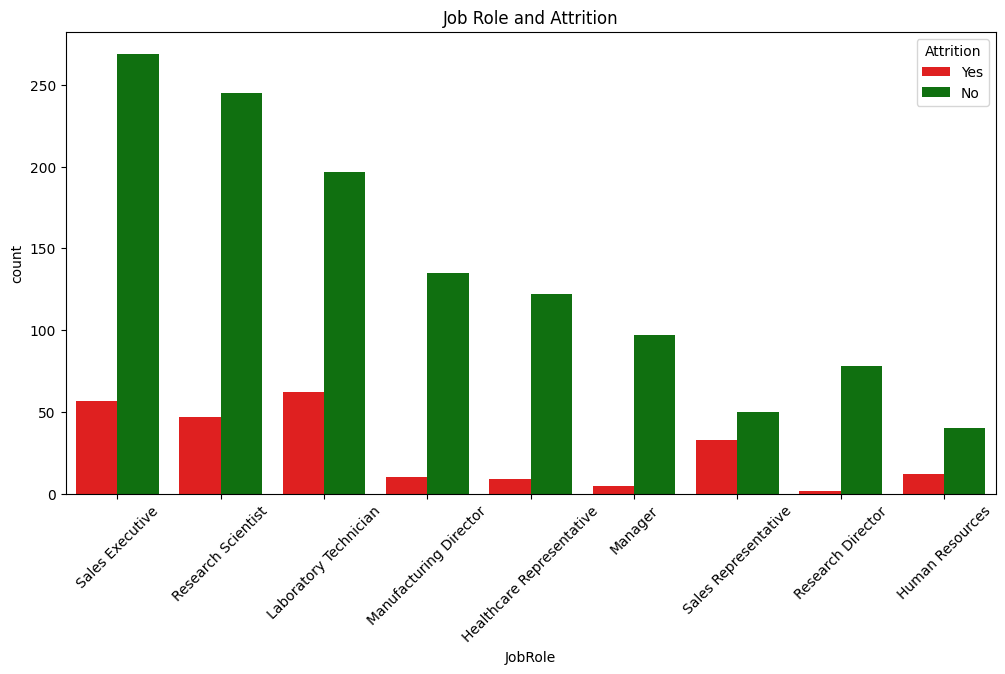

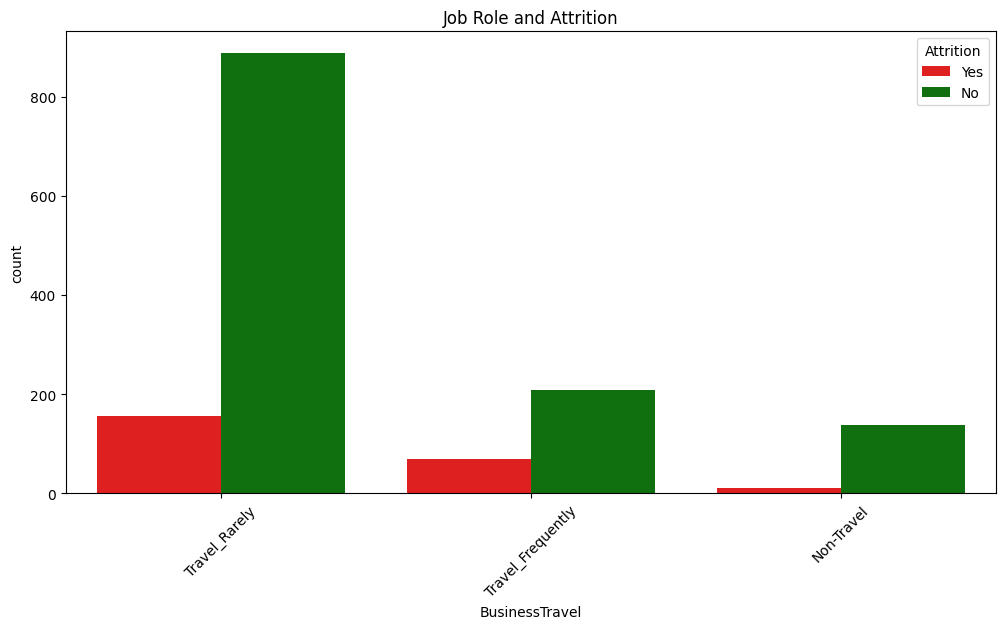

In [8]:
## Bar Chart for Job Role and Attrition
plt.figure(figsize=(12, 6))
sns.countplot(x='JobRole', hue='Attrition', data=employee, palette={'Yes': 'red', 'No': 'green'})
plt.title('Job Role and Attrition')
plt.xticks(rotation=45)
plt.show()

## Bar Chart for Business Travel and Attrition
plt.figure(figsize=(12, 6))
sns.countplot(x='BusinessTravel', hue='Attrition', data=employee, palette={'Yes': 'red', 'No': 'green'})
plt.title('Job Role and Attrition')
plt.xticks(rotation=45)
plt.show()

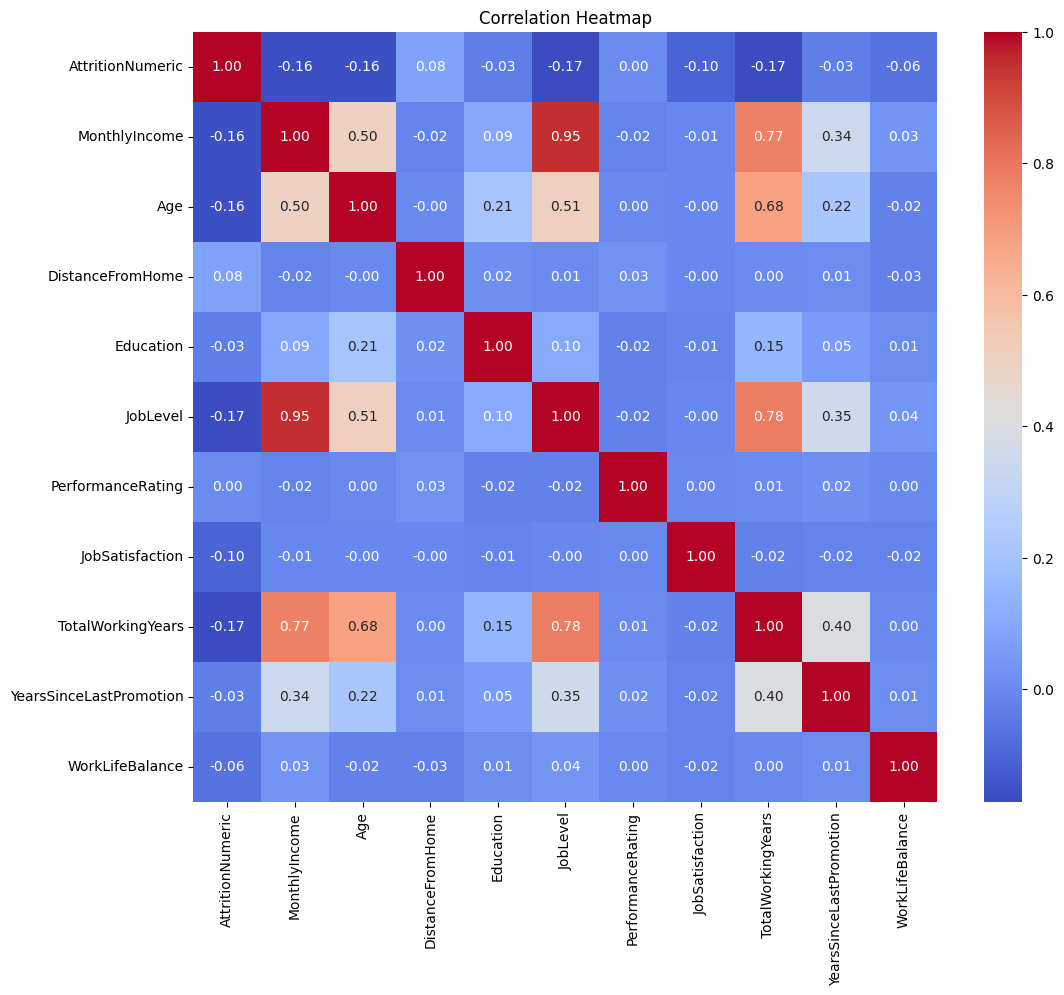

In [9]:
# Convert Attrition to numeric for correlation
employee['AttritionNumeric'] = employee['Attrition'].map({'Yes': 1, 'No': 0})
corrfeat = ['AttritionNumeric', 'MonthlyIncome', 'Age', 'DistanceFromHome', 'Education', 'JobLevel', 'PerformanceRating', 'JobSatisfaction', 'TotalWorkingYears', 'YearsSinceLastPromotion', 'WorkLifeBalance']

# Correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(employee[corrfeat].corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

## Analyze

In [10]:
## Feature Engineering for Data Science
feat = ['MonthlyIncome', 'Age', 'DistanceFromHome', 'Education', 'JobLevel', 'PerformanceRating', 'JobSatisfaction', 'TotalWorkingYears', 'YearsSinceLastPromotion', 'WorkLifeBalance']

X = employee[feat]
y = employee['AttritionNumeric']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [11]:
# Baseline Logistic Regression
print("Baseline Logistic Regression:")
baseline_model = LogisticRegression(max_iter=1000)
baseline_model.fit(X_train_scaled, y_train)

y_pred_baseline = baseline_model.predict(X_test_scaled)
print(classification_report(y_test, y_pred_baseline))

# Feature importance for baseline model
baseline_importance = pd.DataFrame({
    'Feature': feat,
    'Importance': baseline_model.coef_[0]
}).sort_values(by='Importance', key=abs, ascending=False)
print("\nFeature Importance (Baseline):")
print(baseline_importance)

Baseline Logistic Regression:
              precision    recall  f1-score   support

           0       0.86      1.00      0.93       380
           1       1.00      0.02      0.03        61

    accuracy                           0.86       441
   macro avg       0.93      0.51      0.48       441
weighted avg       0.88      0.86      0.80       441


Feature Importance (Baseline):
                   Feature  Importance
7        TotalWorkingYears   -0.483180
6          JobSatisfaction   -0.299536
4                 JobLevel   -0.227745
1                      Age   -0.197758
2         DistanceFromHome    0.189894
9          WorkLifeBalance   -0.156371
8  YearsSinceLastPromotion    0.152028
5        PerformanceRating   -0.071805
3                Education    0.062953
0            MonthlyIncome   -0.031549


In [12]:
# Logistic Regression with Class Weights
print("\nLogistic Regression with Class Weights:")
weighted_model = LogisticRegression(max_iter=1000, class_weight='balanced')
weighted_model.fit(X_train_scaled, y_train)

y_pred_weighted = weighted_model.predict(X_test_scaled)
print(classification_report(y_test, y_pred_weighted))

# Feature importance for weighted model
weighted_importance = pd.DataFrame({
    'Feature': feat,
    'Importance': weighted_model.coef_[0]
}).sort_values(by='Importance', key=abs, ascending=False)
print("\nFeature Importance (Class-Weighted):")
print(weighted_importance)


Logistic Regression with Class Weights:
              precision    recall  f1-score   support

           0       0.91      0.62      0.74       380
           1       0.20      0.61      0.31        61

    accuracy                           0.62       441
   macro avg       0.56      0.61      0.52       441
weighted avg       0.81      0.62      0.68       441


Feature Importance (Class-Weighted):
                   Feature  Importance
7        TotalWorkingYears   -0.389191
6          JobSatisfaction   -0.301915
1                      Age   -0.167034
2         DistanceFromHome    0.165166
8  YearsSinceLastPromotion    0.156458
4                 JobLevel   -0.150476
9          WorkLifeBalance   -0.146245
0            MonthlyIncome   -0.110864
5        PerformanceRating   -0.108920
3                Education    0.031983


In [13]:
# Random Forest Classifier
print("\nRandom Forest Classifier:")
rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)
print(classification_report(y_test, y_pred_rf))

# Feature importance for Random Forest
rf_importance = pd.DataFrame({
    'Feature': feat,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)
print("\nFeature Importance (Random Forest):")
print(rf_importance)


Random Forest Classifier:
              precision    recall  f1-score   support

           0       0.87      0.97      0.92       380
           1       0.29      0.07      0.11        61

    accuracy                           0.85       441
   macro avg       0.58      0.52      0.51       441
weighted avg       0.79      0.85      0.80       441


Feature Importance (Random Forest):
                   Feature  Importance
0            MonthlyIncome    0.231565
1                      Age    0.163618
7        TotalWorkingYears    0.141403
2         DistanceFromHome    0.130685
8  YearsSinceLastPromotion    0.077208
6          JobSatisfaction    0.067266
3                Education    0.060901
4                 JobLevel    0.054137
9          WorkLifeBalance    0.053994
5        PerformanceRating    0.019223


## Share
* To address the business challenge of predicting employee attrition, I implemented and compared three models: baseline logistic regression, logistic regression with class weights, and a random forest classifier. The **class-weighted logistic regression** was chosen as the best model due to its balanced performance, achieving a **61% recall for attrition cases** and maintaining interpretability.
* **Model Limitations**: While the model balances recall for attrition cases, it sacrifices some accuracy (**61%**) and precision for non-attrition cases. As such, its predictions should be used in conjunction with qualitative data, such as employee feedback.

## Final Insights
### Key Drivers of Attrition
* The model identified the following key features influencing employee attrition:
* **Total Working Years (-0.39)**: Employees with more experience are less likely to leave. Retention strategies may focus on rewarding long-tenured employees through recognition programs or career progression opportunities.
* **Job Satisfaction (-0.30)**: Lower job satisfaction significantly increases the likelihood of attrition. Conducting regular employee surveys and implementing feedback-driven improvements in workplace conditions could improve retention.
* **Age (-0.17)**: Younger employees are more prone to leave. Tailored engagement strategies for early-career professionals, such as mentorship or skill-building programs, could help reduce turnover.
* **Distance from Home (+0.16)**: Employees who live further away from work are more likely to leave. Offering flexible work arrangements, such as remote work or hybrid schedules, may mitigate this factor.
* **Years Since Last Promotion (+0.16)**: Longer periods without a promotion increase attrition risk. Establishing clear career advancement pathways could help reduce dissatisfaction and attrition.

### Practical Recommendations:
* **Enhance Job Satisfaction**: Invest in initiatives that foster a positive work environment, such as wellness programs, competitive benefits, and team-building activities.
* **Support Younger Employees**: Focus on mentorship, career development, and creating a sense of purpose for employees in the early stages of their careers.
* **Improve Work-Life Balance**: Address flexibility needs for employees, especially those with long commutes or personal commitments, to improve retention.
* **Focus on Career Growth**: Ensure timely promotions or lateral growth opportunities to keep employees engaged and motivated.